# Libraries, directory and data

In [1]:
pip install colorama

Note: you may need to restart the kernel to use updated packages.


In [2]:
#libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns # Visualization
from colorama import Fore

plt.style.use('fivethirtyeight')


import warnings # Supress warnings
warnings.filterwarnings('ignore')

np.random.seed(7)

In [3]:
#load the data
#YYYY-MM-DD
df = pd.read_csv('nyc_data.csv', delimiter=',', index_col = 0, parse_dates = True)
df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


In [4]:
#Readd_suffixname target variable
df = df.rename(columns = {'Demand': 'y'})
#sanity check
df.head(0)

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,


In [5]:
df.isnull().any()

y               False
Easter          False
Thanksgiving    False
Christmas       False
Temperature     False
Marketing       False
dtype: bool

In [6]:
df.isna().sum()

y               0
Easter          0
Thanksgiving    0
Christmas       0
Temperature     0
Marketing       0
dtype: int64

# Data Analysis

In [7]:
#Summary statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
y,2192.0,756.059227,152.143070,425.77532,641.161123,736.94763,855.645886,1384.908525
Easter,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Thanksgiving,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Christmas,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Temperature,2192.0,15.012655,8.772751,-8.85000,7.767500,14.89500,23.230000,30.900000
Marketing,2192.0,126.675890,58.274047,24.58900,78.303500,122.76450,169.395250,299.860000


<AxesSubplot:>

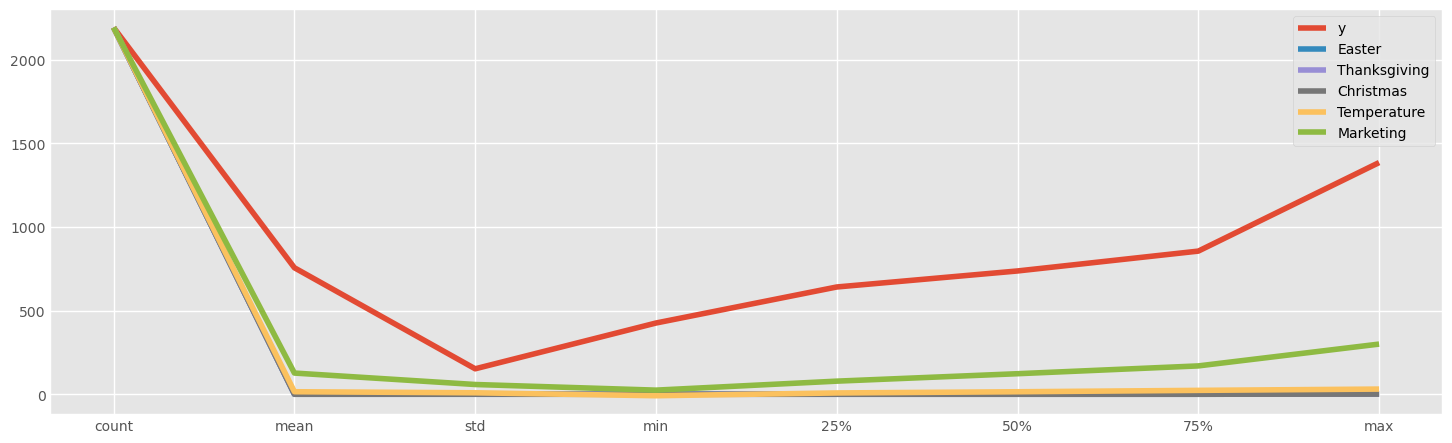

In [8]:
plt.style.use('ggplot')

df.describe().plot(figsize = (16,5))

In [9]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

1384.908525
425.7753195


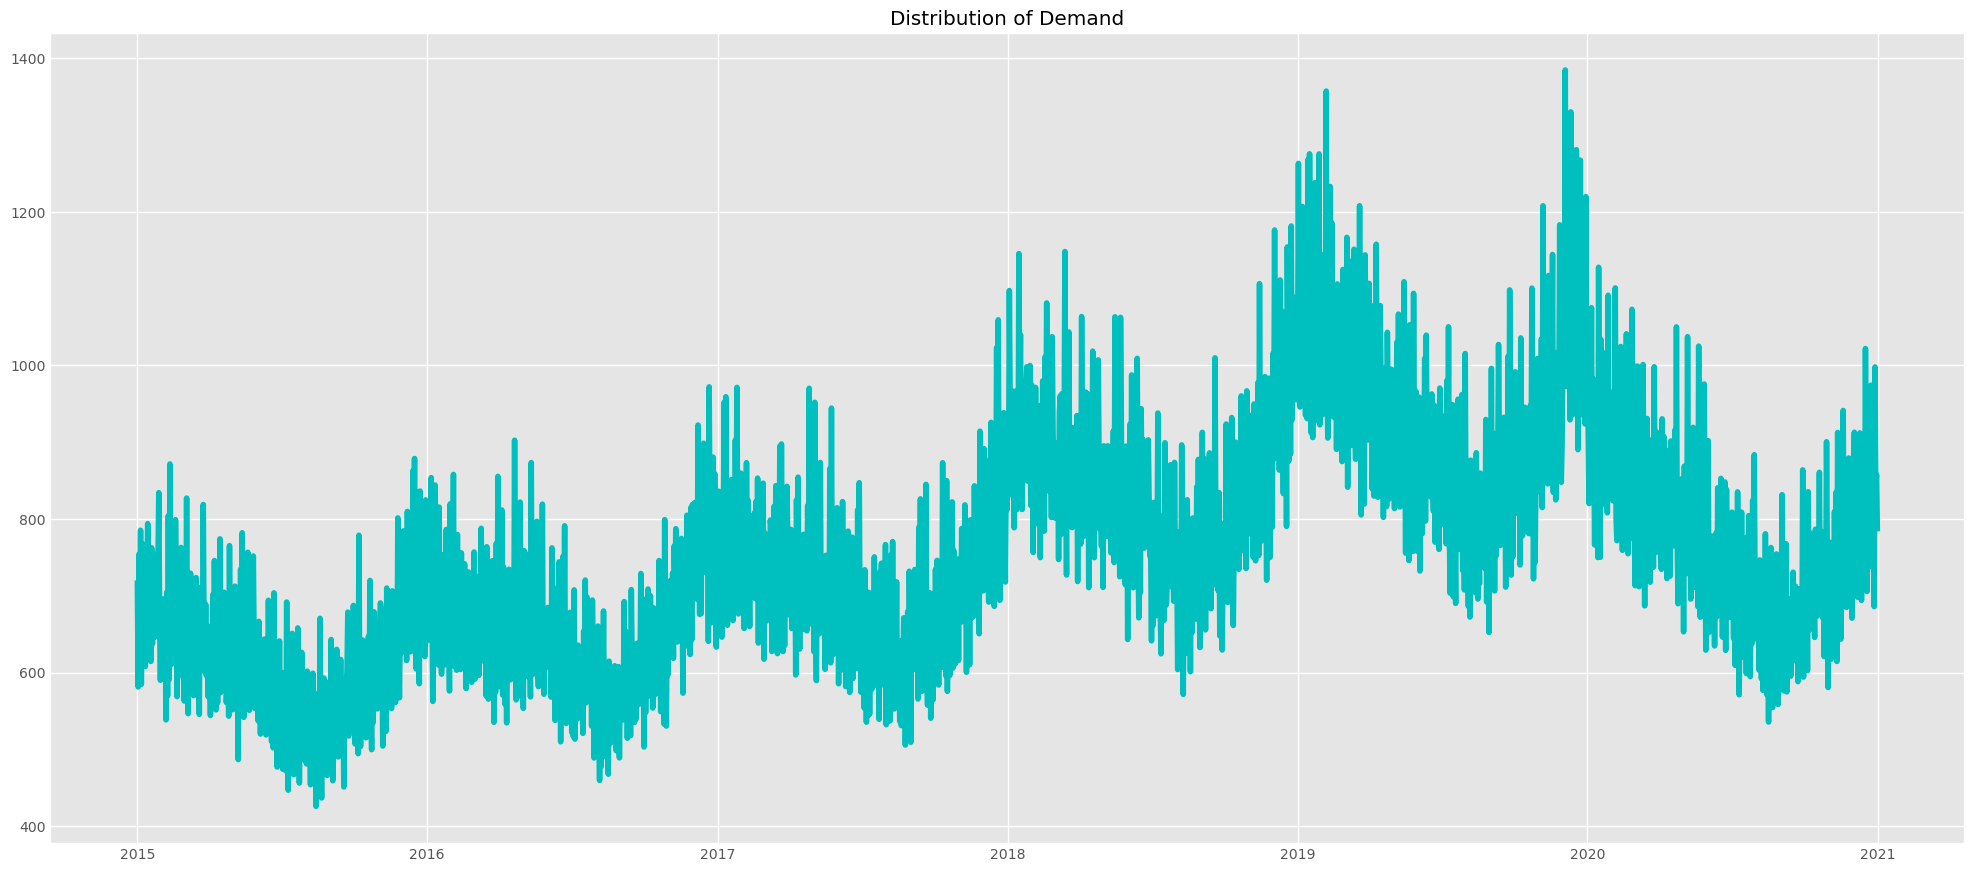

In [10]:
plt.style.use('ggplot')
print(df['y'].max())
print(df['y'].min())

plt.figure(figsize=(22,10))
plt.plot(df['y'], color = 'c')
plt.title('Distribution of Demand')
plt.show()

30.9
-8.85


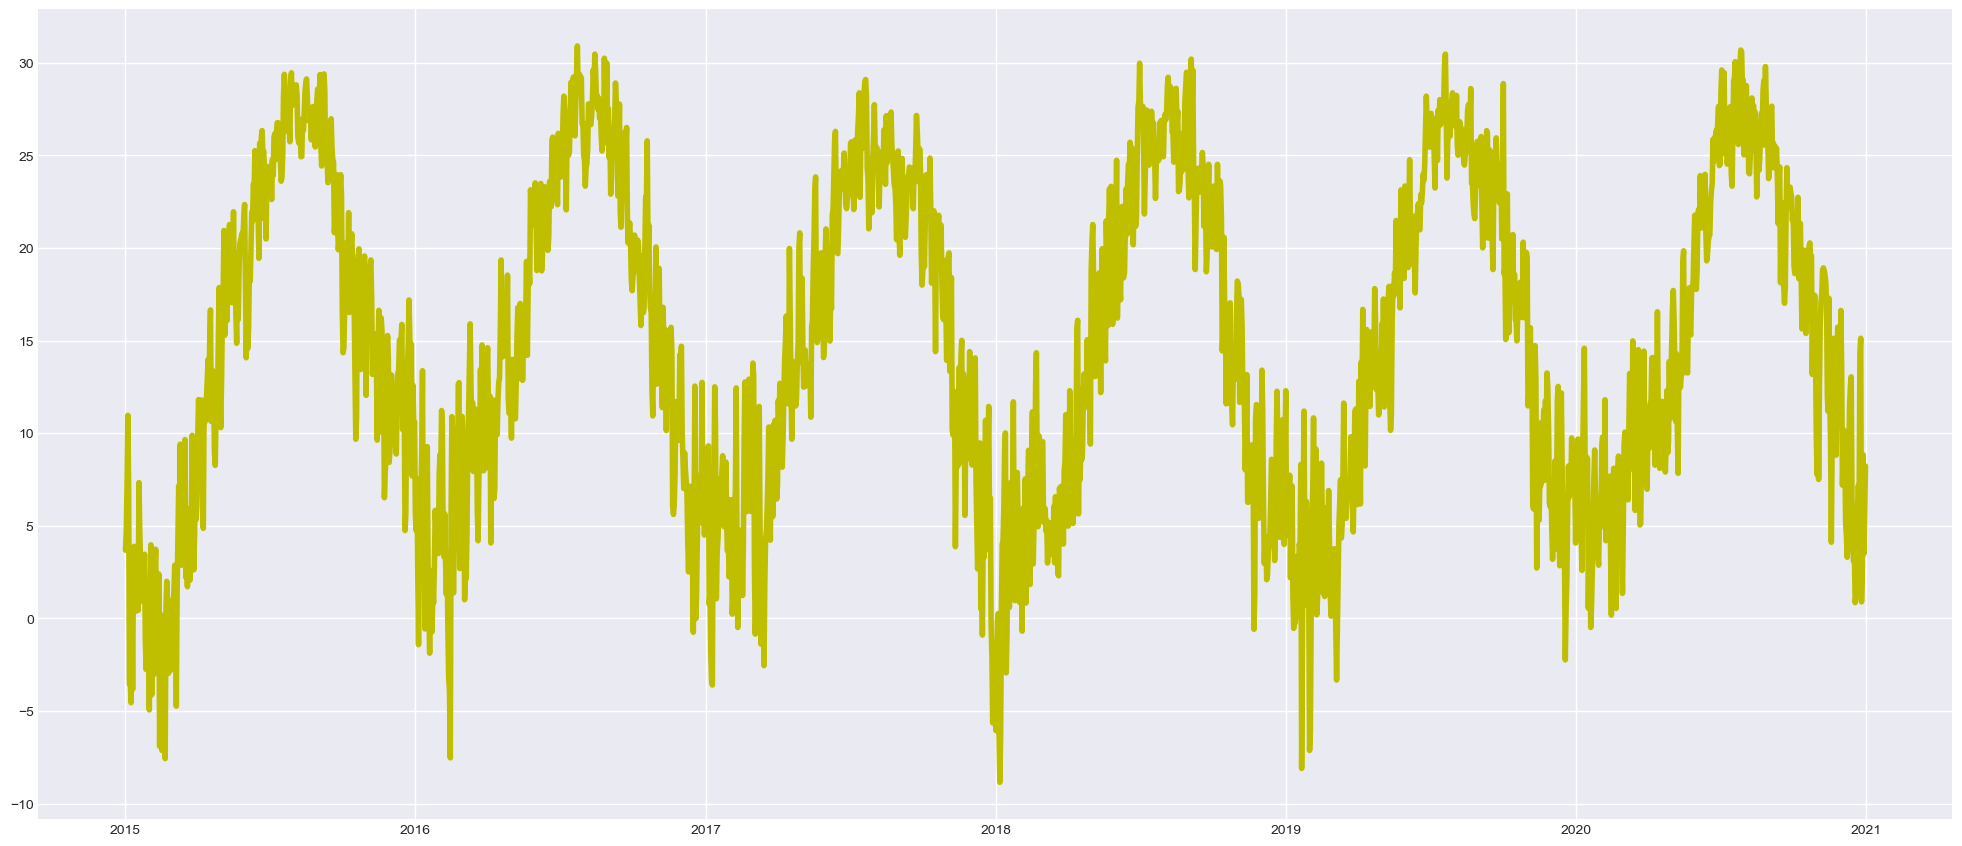

In [11]:
plt.style.use('seaborn-darkgrid')
print(df['Temperature'].max())
print(df['Temperature'].min())

plt.figure(figsize=(22,10))
plt.plot(df['Temperature'], color = 'y')
plt.show()

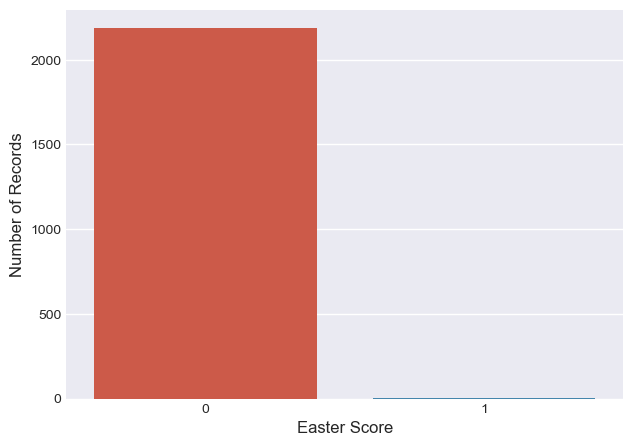

In [12]:
sns.countplot(x=df['Easter'], data=df)
plt.xlabel('Easter Score')
plt.ylabel('Number of Records')
plt.show()

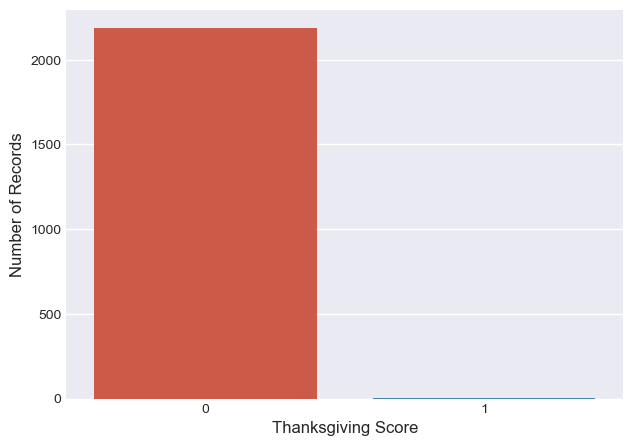

In [13]:
sns.countplot(x=df['Thanksgiving'], data=df)
plt.xlabel('Thanksgiving Score')
plt.ylabel('Number of Records')
plt.show()

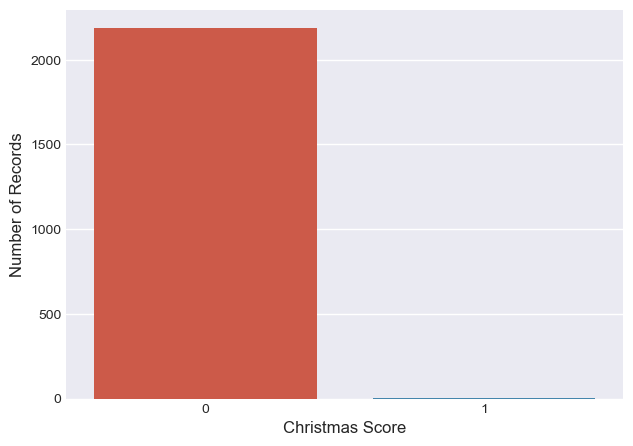

In [14]:
sns.countplot(x=df['Christmas'], data=df)
plt.xlabel('Christmas Score')
plt.ylabel('Number of Records')
plt.show()

# Seasonal Decomposition

Text(0, 0.5, 'Residual')

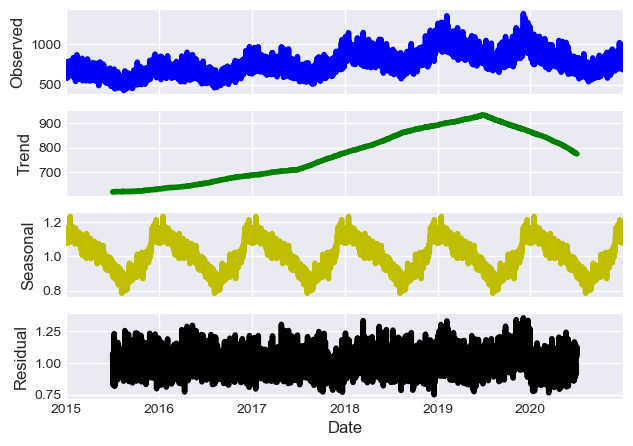

In [15]:
plt.style.use('seaborn-darkgrid')
fig, axes = plt.subplots(4, 1, sharex=True)

decomposition = seasonal_decompose(x = df.y,
                                   model = 'multiplicative',
                                   period = 365)

decomposition.observed.plot(ax=axes[0], legend=False, color='b')
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False, color = 'y')
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False, color='k')
axes[3].set_ylabel('Residual')

We can sharply notice that the trend seems to gradually rise from 2016 to around middle of 2019 and then fall.

Text(0, 0.5, 'Residual')

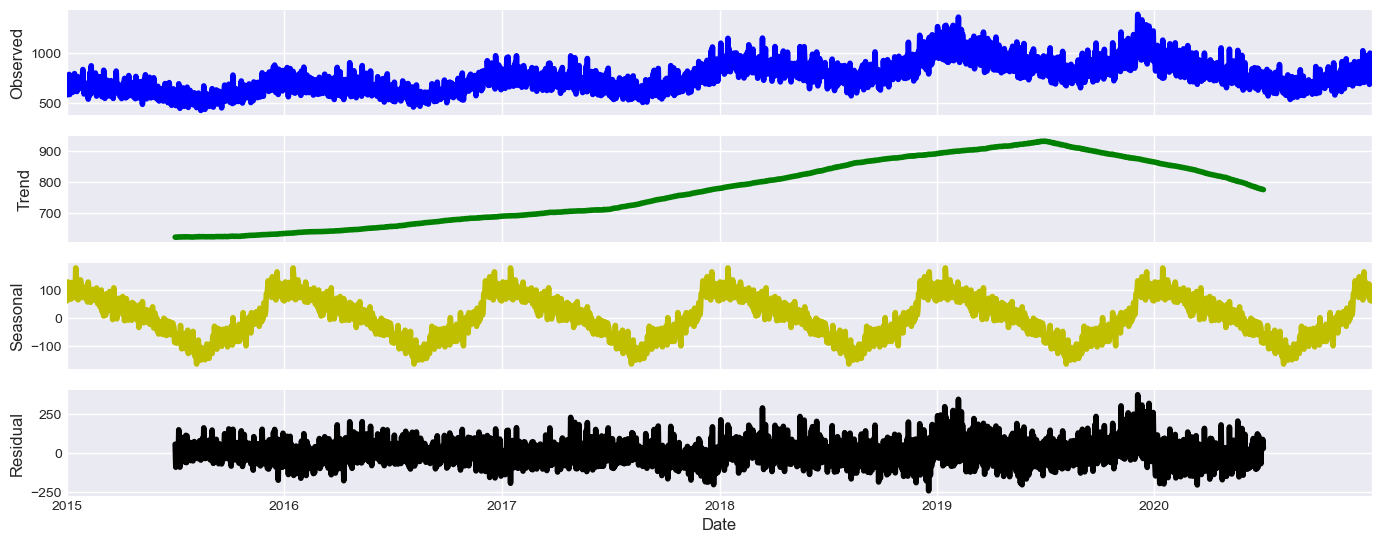

In [16]:
plt.rcParams["figure.figsize"] = (15,6)

t_decomposition = seasonal_decompose(x = df.y,
                                   model = 'additive',
                                   period = 365)
#t_decomposition.plot();

fig, axes = plt.subplots(4, 1, sharex=True)


t_decomposition.observed.plot(ax=axes[0], legend=False, color='b')
axes[0].set_ylabel('Observed')
t_decomposition.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
t_decomposition.seasonal.plot(ax=axes[2], legend=False, color = 'y')
axes[2].set_ylabel('Seasonal')
t_decomposition.resid.plot(ax=axes[3], legend=False, color='k')
axes[3].set_ylabel('Residual')

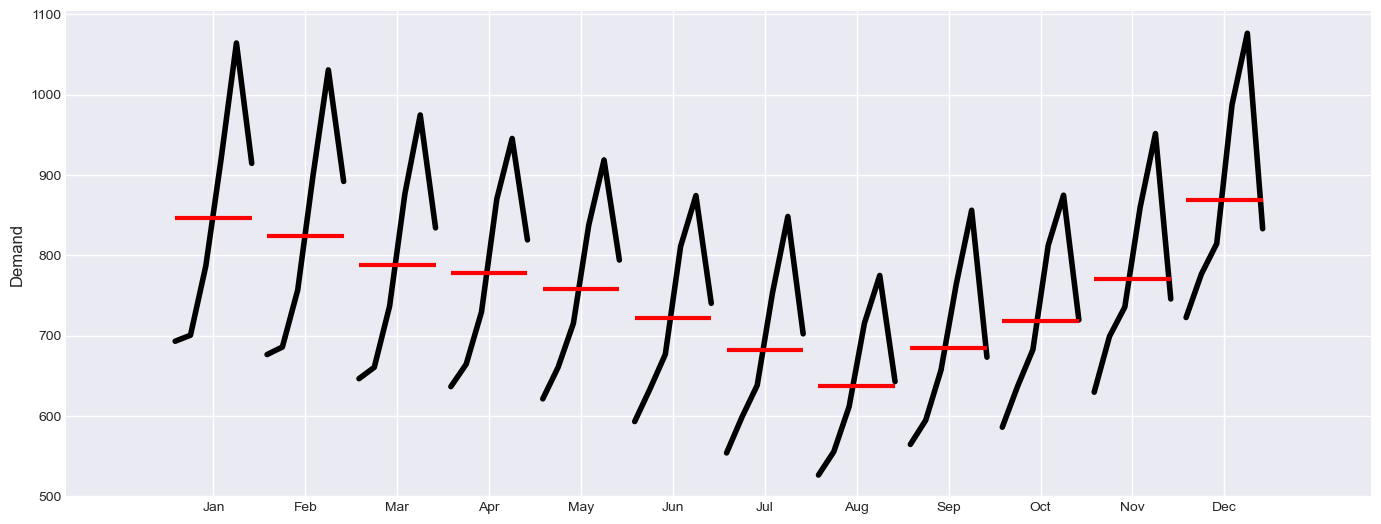

In [17]:
#Seasonal graphs
plt.rc("figure", figsize=(15,6))
month_plot(df.y.resample(rule = 'MS').mean(), ylabel = 'Demand');

We can observe that the seasonality has an interesting pattern. It seems to be higher in colder months of the year, like January and drops around August, from where it seems to rise again. The black lines are the trends of the respective months, and the red bars represent the average seasonality.

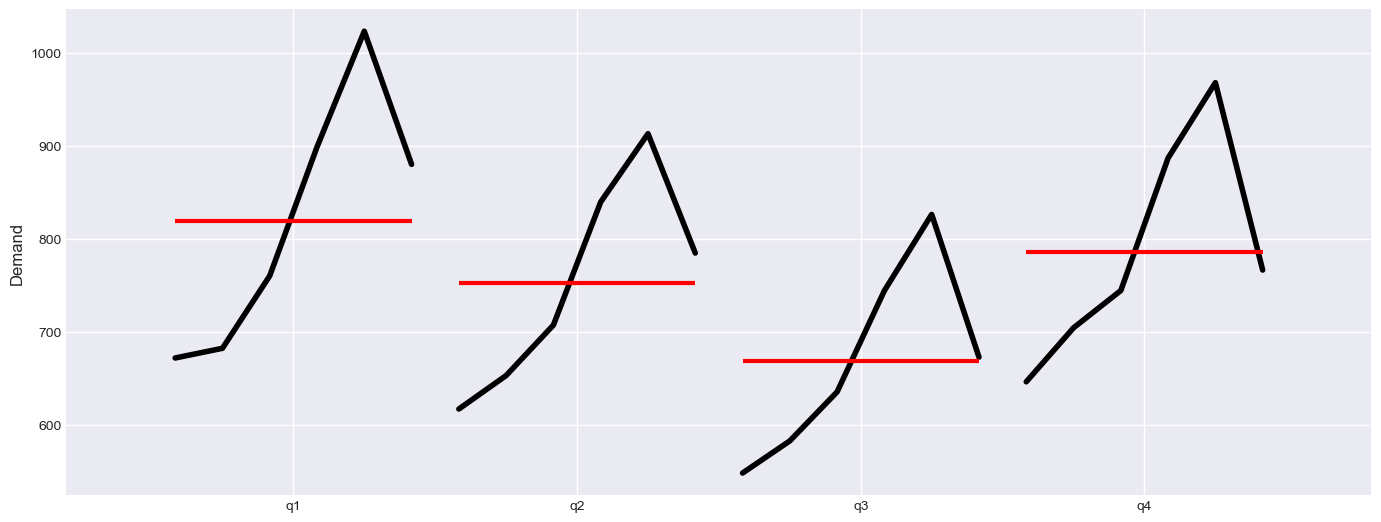

In [18]:
plt.rc("figure", figsize=(15,6))
quarter_plot(df.y.resample(rule = 'Q').mean(), ylabel = 'Demand');

The Quarterly plot show the seasonality component in a more aggregated manner. It seems to rise in 1st quarters, and fall towards 3rd quarter where it starts to rise again.

In [19]:
#Aggregating on specific time frame
df.y.resample(rule = 'MS').mean()

Date
2015-01-01    692.967611
2015-02-01    676.381042
2015-03-01    646.326069
2015-04-01    636.463333
2015-05-01    621.211624
                 ...    
2020-08-01    642.785119
2020-09-01    673.093698
2020-10-01    719.514838
2020-11-01    745.599826
2020-12-01    832.963040
Freq: MS, Name: y, Length: 72, dtype: float64

In [20]:
df.y.resample(rule = 'Q').mean()

Date
2015-03-31     671.741925
2015-06-30     616.931604
2015-09-30     548.119569
2015-12-31     646.169057
2016-03-31     682.167449
2016-06-30     652.907205
2016-09-30     582.677771
2016-12-31     704.175464
2017-03-31     760.062816
2017-06-30     707.169163
2017-09-30     635.352104
2017-12-31     744.235313
2018-03-31     898.462319
2018-06-30     839.412707
2018-09-30     744.160522
2018-12-31     886.628453
2019-03-31    1022.859603
2019-06-30     912.762397
2019-09-30     826.016904
2019-12-31     967.626501
2020-03-31     879.812426
2020-06-30     784.503065
2020-09-30     672.664529
2020-12-31     766.247924
Freq: Q-DEC, Name: y, dtype: float64

<AxesSubplot:xlabel='Date'>

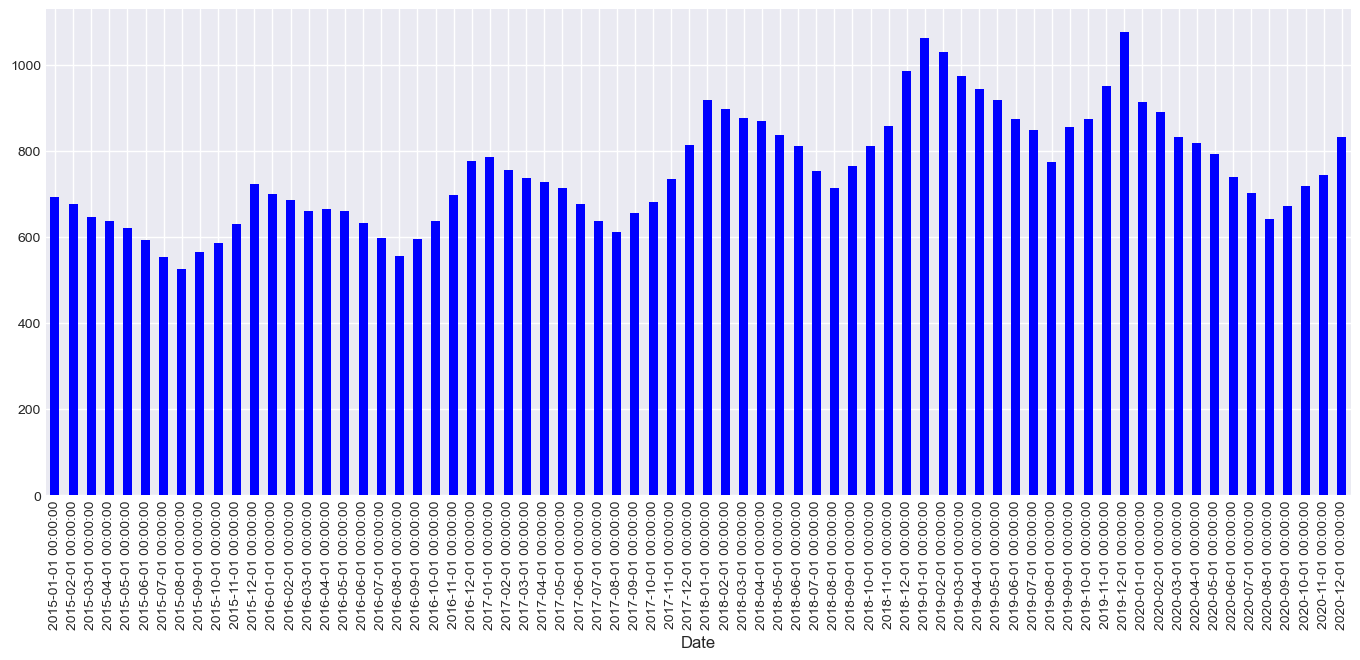

In [21]:
df.y.resample(rule = 'MS').mean().plot(kind = 'bar', color = 'b')

<AxesSubplot:xlabel='Date'>

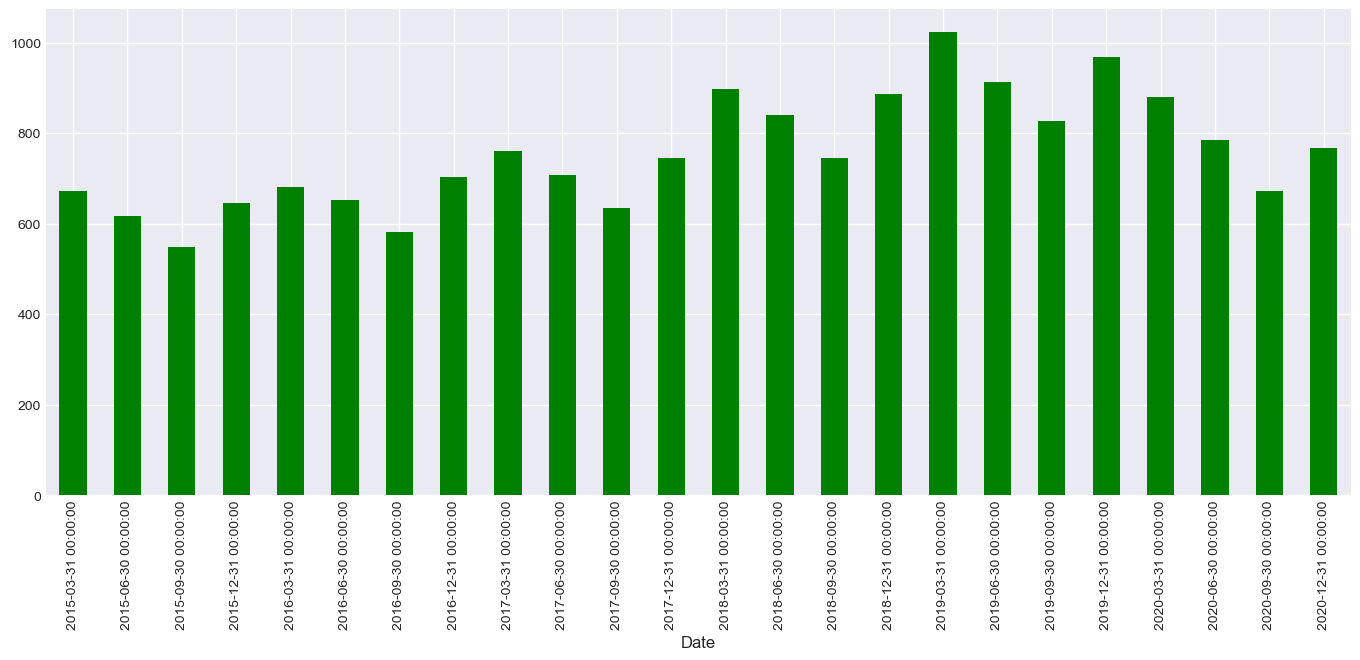

In [22]:
df.y.resample(rule = 'Q').mean().plot(kind = 'bar', color = 'g')

# Smoothing by Rolling

In [23]:
df['y:30 days rolling']=df['y'].rolling(30).mean()
df.head(31)

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing,y:30 days rolling
Date,,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305,NaN
2015-01-02,581.276773,0,0,0,4.73,131.574,NaN
2015-01-03,754.117039,0,0,0,7.23,162.700,NaN
2015-01-04,622.252774,0,0,0,10.96,160.281,NaN
2015-01-05,785.373319,0,0,0,6.92,51.077,NaN
2015-01-06,584.782983,0,0,0,-3.54,99.972,NaN
2015-01-07,698.965705,0,0,0,-3.44,192.427,NaN
2015-01-08,767.221315,0,0,0,-4.55,85.599,NaN
2015-01-09,608.664340,0,0,0,1.08,131.770,NaN


Text(0.5, 1.0, 'Smoothened Time Series Representation')

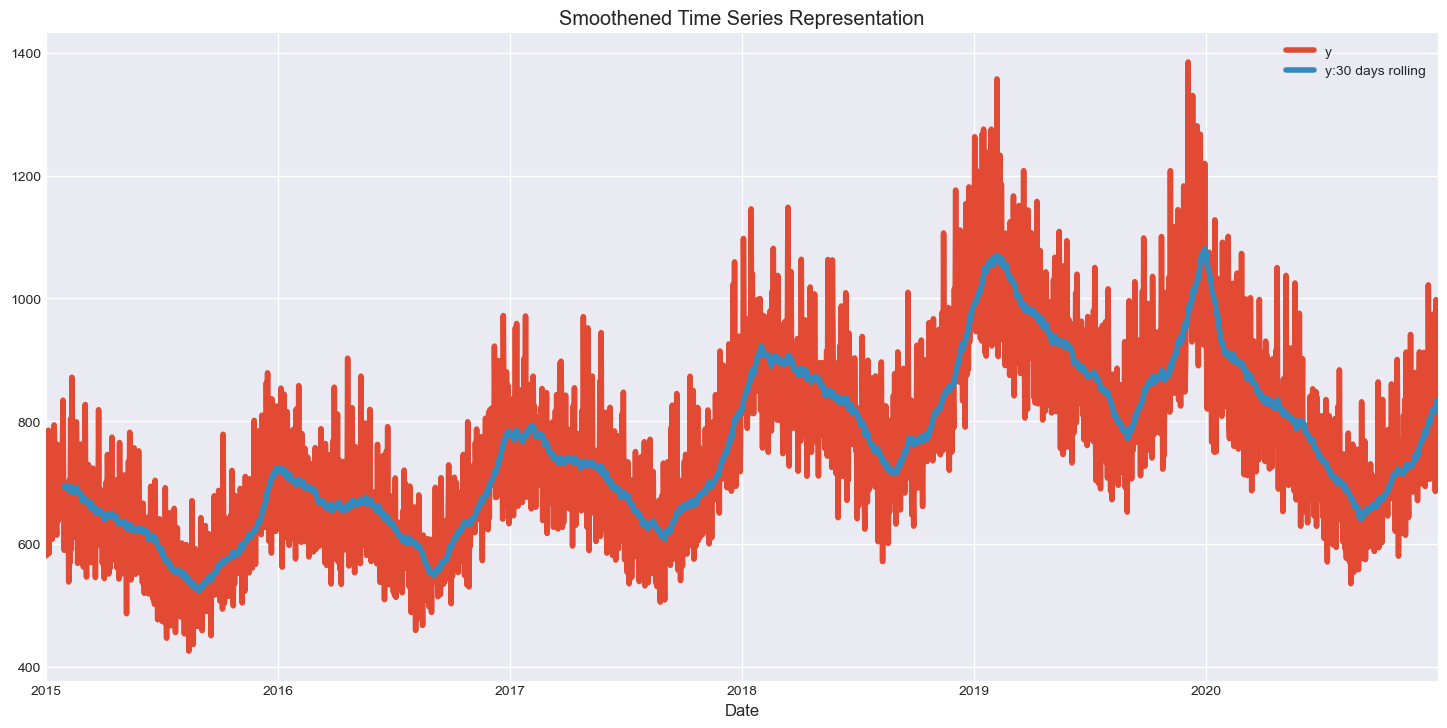

In [24]:
plt.style.use('seaborn-darkgrid')
df[['y','y:30 days rolling']].plot(figsize=(16,8))
plt.title('Smoothened Time Series Representation')

# Advanced Analysis

Text(0, 0.5, 'Temperature')

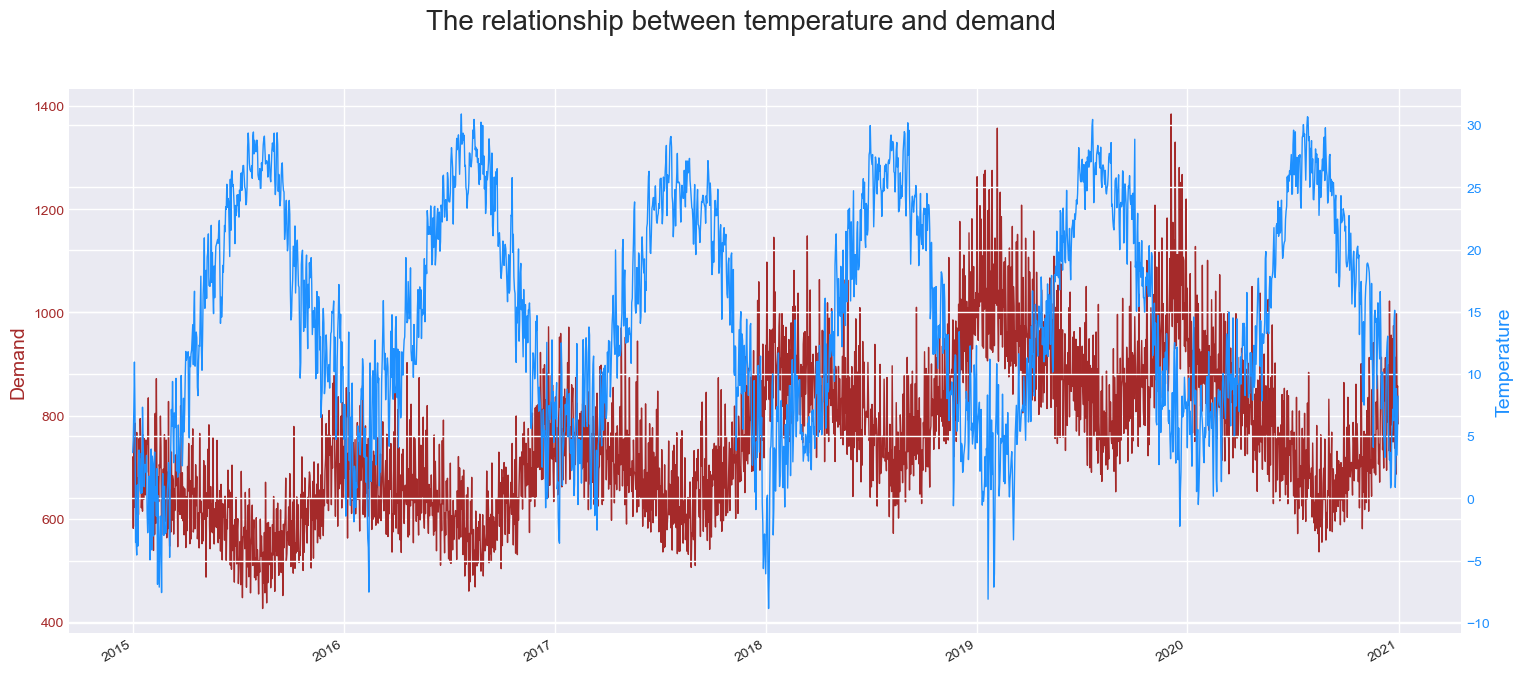

In [25]:
#Create a copy of the dataframe
df_plot = df

#Define the colors
temp_color = 'dodgerblue'
y_color = 'brown'

#plot
fig, ax1 = plt.subplots(figsize = (16,8))
ax2 = ax1.twinx()

#Data and Lines
ax1.plot(df_plot.index, df_plot.y, color = y_color, lw = 1)
ax2.plot(df_plot.index, df_plot.Temperature, color = temp_color, lw = 1)

#Title and dates
fig.suptitle("The relationship between temperature and demand", fontsize = 20)
fig.autofmt_xdate()

#first axis
ax1.set_label("Date")
ax1.tick_params(axis = "y", labelcolor = y_color)
ax1.set_ylabel("Demand", color = y_color, fontsize = 14)

#second axis
ax2.tick_params(axis = "y", labelcolor = temp_color)
ax2.set_ylabel("Temperature", color = temp_color, fontsize = 14)



Here, we can see that the Demand and Temperature are inversely correlated, which means that Demand tends to increase when Temperature decreases and vice-versa.

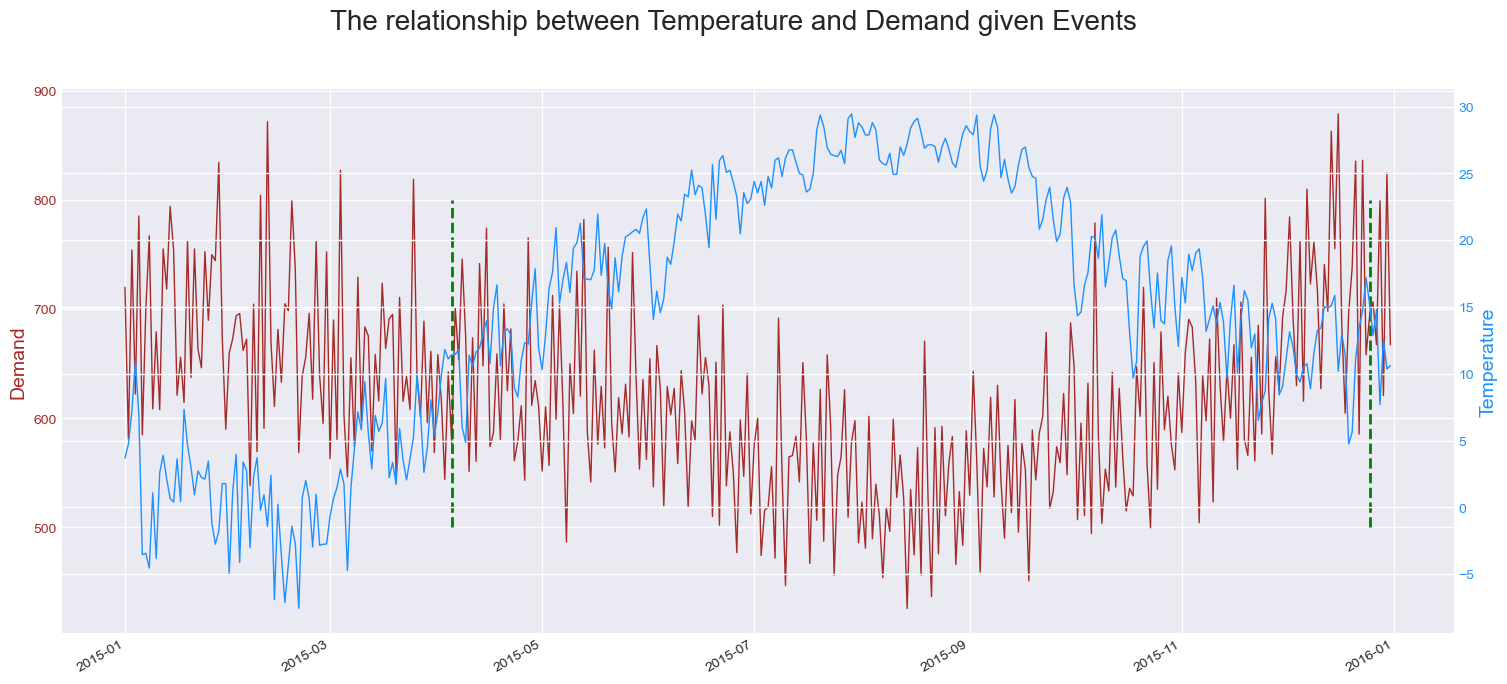

In [26]:
df_plot = df.loc['2015-01-01':'2015-12-31']

#Define the colors
temp_color = 'dodgerblue'
y_color = 'brown'

#plot
fig, ax1 = plt.subplots(figsize = (16,8))
ax2 = ax1.twinx()

#Data and Lines
ax1.plot(df_plot.index, df_plot.y, color = y_color, lw = 1)
ax2.plot(df_plot.index, df_plot.Temperature, color = temp_color, lw = 1)

#Title and dates
fig.suptitle("The relationship between Temperature and Demand given Events", fontsize = 20)
fig.autofmt_xdate()

#first axis
ax1.set_label("Date")
ax1.tick_params(axis = "y", labelcolor = y_color)
ax1.set_ylabel("Demand", color = y_color, fontsize = 14)

#second axis
ax2.tick_params(axis = "y", labelcolor = temp_color)
ax2.set_ylabel("Temperature", color = temp_color, fontsize = 14)

#Add holidays or events
events = df_plot[(df_plot.Easter == 1) | (df_plot.Christmas == 1)].index
ax1.vlines(x = events, ymin = 500, ymax = 800, color = 'green', ls = '--', lw = 2)

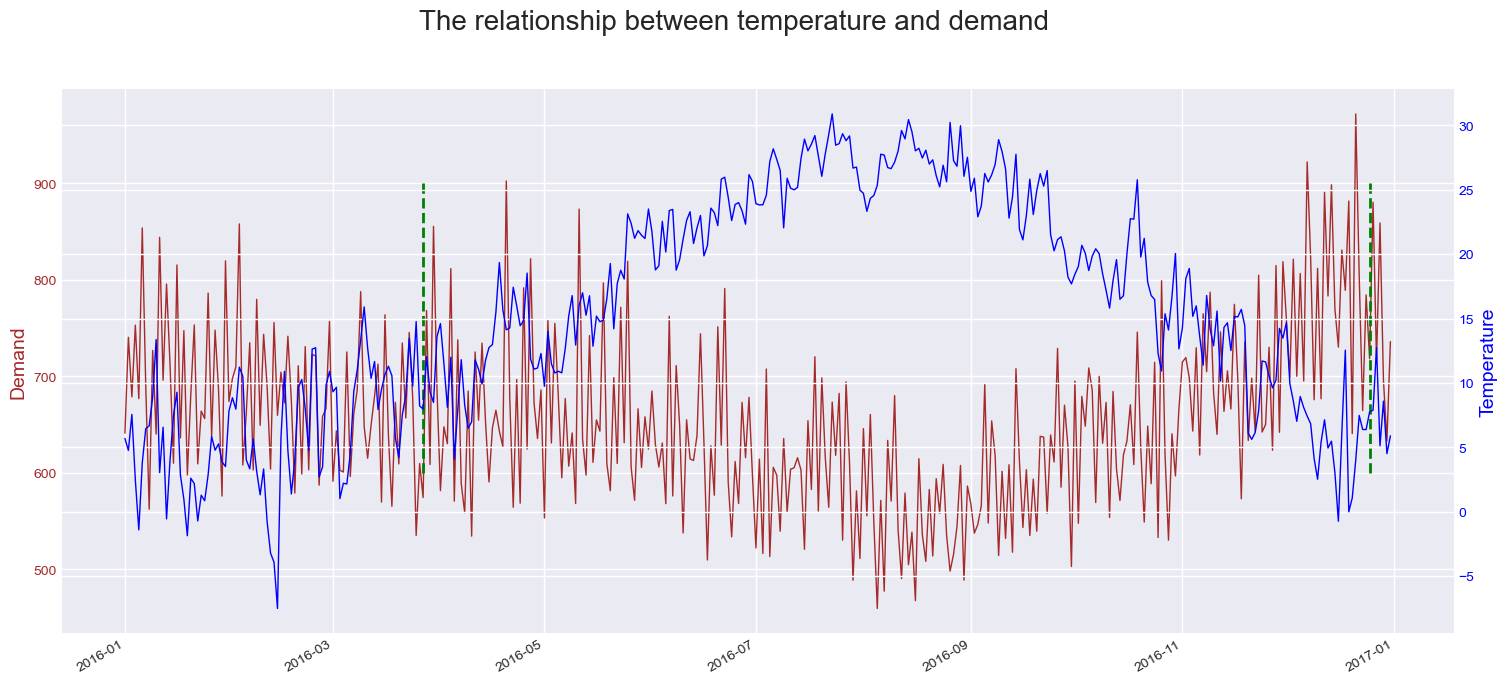

In [27]:
df_plot = df.loc['2016-01-01':'2016-12-31']

#Define the colors
temp_color = 'blue'
y_color = 'brown'

#plot
fig, ax1 = plt.subplots(figsize = (16,8))
ax2 = ax1.twinx()

#Data and Lines
ax1.plot(df_plot.index, df_plot.y, color = y_color, lw = 1)
ax2.plot(df_plot.index, df_plot.Temperature, color = temp_color, lw = 1)

#Title and dates
fig.suptitle("The relationship between temperature and demand", fontsize = 20)
fig.autofmt_xdate()

#first axis
ax1.set_label("Date")
ax1.tick_params(axis = "y", labelcolor = y_color)
ax1.set_ylabel("Demand", color = y_color, fontsize = 14)

#second axis
ax2.tick_params(axis = "y", labelcolor = temp_color)
ax2.set_ylabel("Temperature", color = temp_color, fontsize = 14)

#Add holidays or events
events = df_plot[(df_plot.Easter == 1) | (df_plot.Christmas == 1)].index
ax1.vlines(x = events, ymin = 600, ymax = 900, color = 'green', ls = '--', lw = 2)

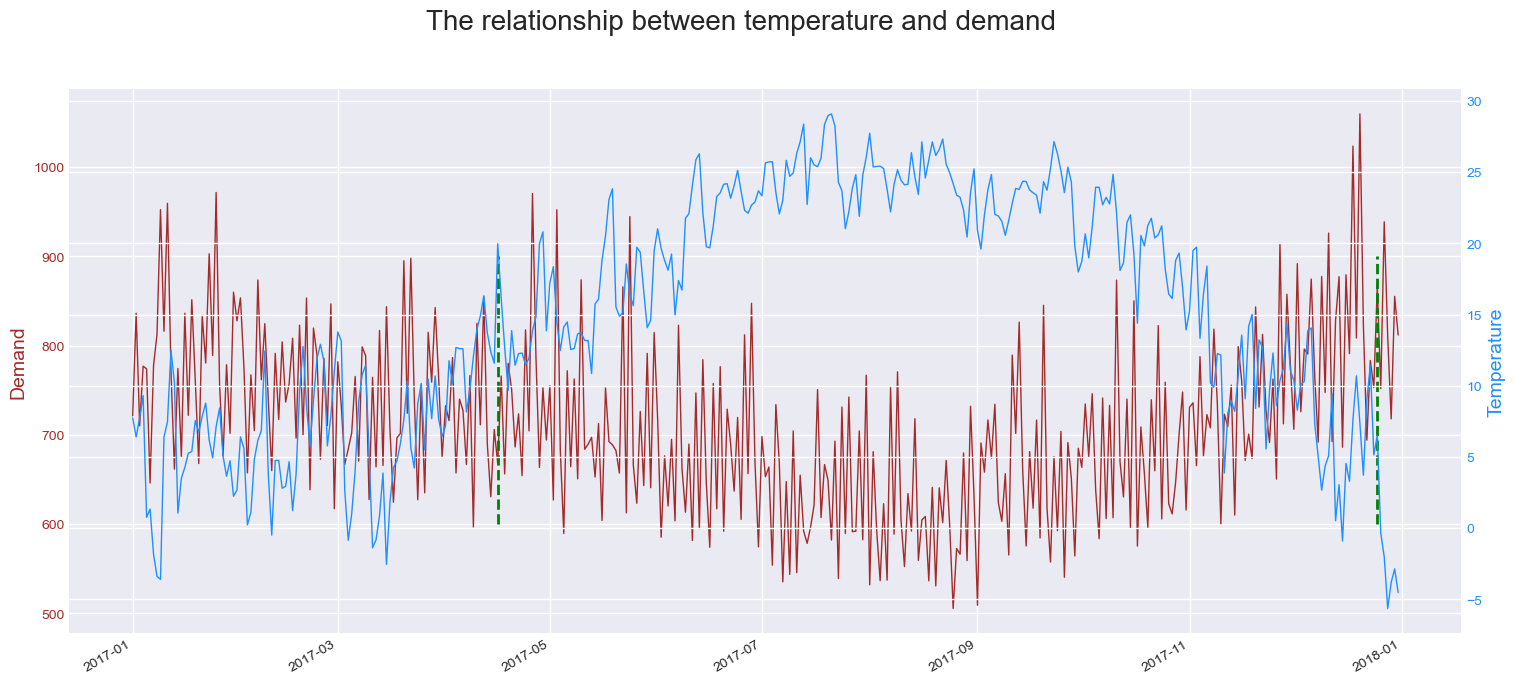

In [28]:
df_plot = df.loc['2017-01-01':'2017-12-31']

#Define the colors
temp_color = 'dodgerblue'
y_color = 'brown'

#plot
fig, ax1 = plt.subplots(figsize = (16,8))
ax2 = ax1.twinx()

#Data and Lines
ax1.plot(df_plot.index, df_plot.y, color = y_color, lw = 1)
ax2.plot(df_plot.index, df_plot.Temperature, color = temp_color, lw = 1)

#Title and dates
fig.suptitle("The relationship between temperature and demand", fontsize = 20)
fig.autofmt_xdate()

#first axis
ax1.set_label("Date")
ax1.tick_params(axis = "y", labelcolor = y_color)
ax1.set_ylabel("Demand", color = y_color, fontsize = 14)

#second axis
ax2.tick_params(axis = "y", labelcolor = temp_color)
ax2.set_ylabel("Temperature", color = temp_color, fontsize = 14)

#Add holidays or events
events = df_plot[(df_plot.Easter == 1) | (df_plot.Christmas == 1)].index
ax1.vlines(x = events, ymin = 600, ymax = 900, color = 'green', ls = '--', lw = 2)

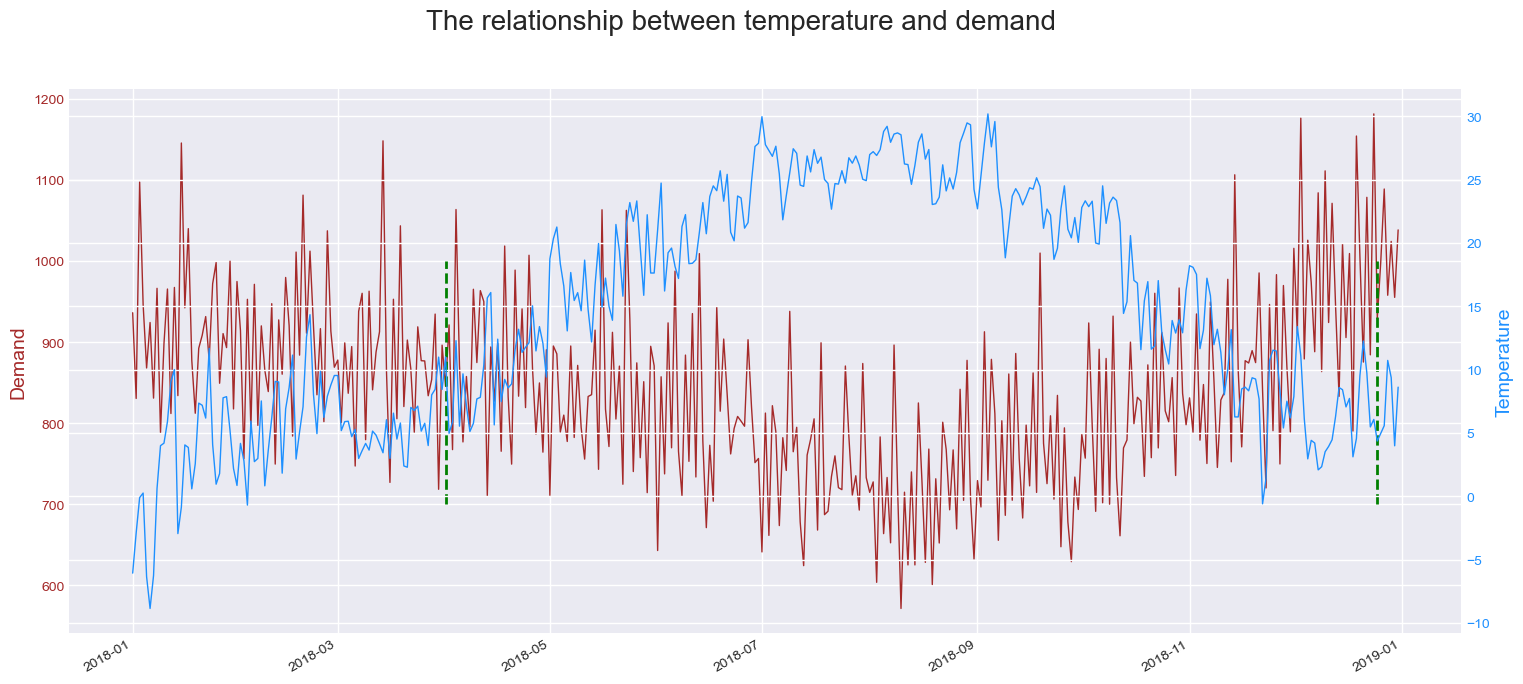

In [29]:
df_plot = df.loc['2018-01-01':'2018-12-31']

#Define the colors
temp_color = 'dodgerblue'
y_color = 'brown'

#plot
fig, ax1 = plt.subplots(figsize = (16,8))
ax2 = ax1.twinx()

#Data and Lines
ax1.plot(df_plot.index, df_plot.y, color = y_color, lw = 1)
ax2.plot(df_plot.index, df_plot.Temperature, color = temp_color, lw = 1)

#Title and dates
fig.suptitle("The relationship between temperature and demand", fontsize = 20)
fig.autofmt_xdate()

#first axis
ax1.set_label("Date")
ax1.tick_params(axis = "y", labelcolor = y_color)
ax1.set_ylabel("Demand", color = y_color, fontsize = 14)

#second axis
ax2.tick_params(axis = "y", labelcolor = temp_color)
ax2.set_ylabel("Temperature", color = temp_color, fontsize = 14)

#Add holidays or events
events = df_plot[(df_plot.Easter == 1) | (df_plot.Christmas == 1)].index
ax1.vlines(x = events, ymin = 700, ymax = 1000, color = 'green', ls = '--', lw = 2)

# Correlation

In [30]:
df[['y', 'Temperature']].corr()

,y,Temperature
y,1.000000,-0.400261
Temperature,-0.400261,1.000000


Negative correlation exists between Demand and Temperature.

In [31]:
df[['y', 'Temperature', 'Marketing']].corr()

,y,Temperature,Marketing
y,1.000000,-0.400261,0.275139
Temperature,-0.400261,1.000000,-0.185626
Marketing,0.275139,-0.185626,1.000000


Positive Correlation exists between Demand and Marketing.

In [32]:
features = ['y','Temperature', 'Marketing']

<AxesSubplot:>

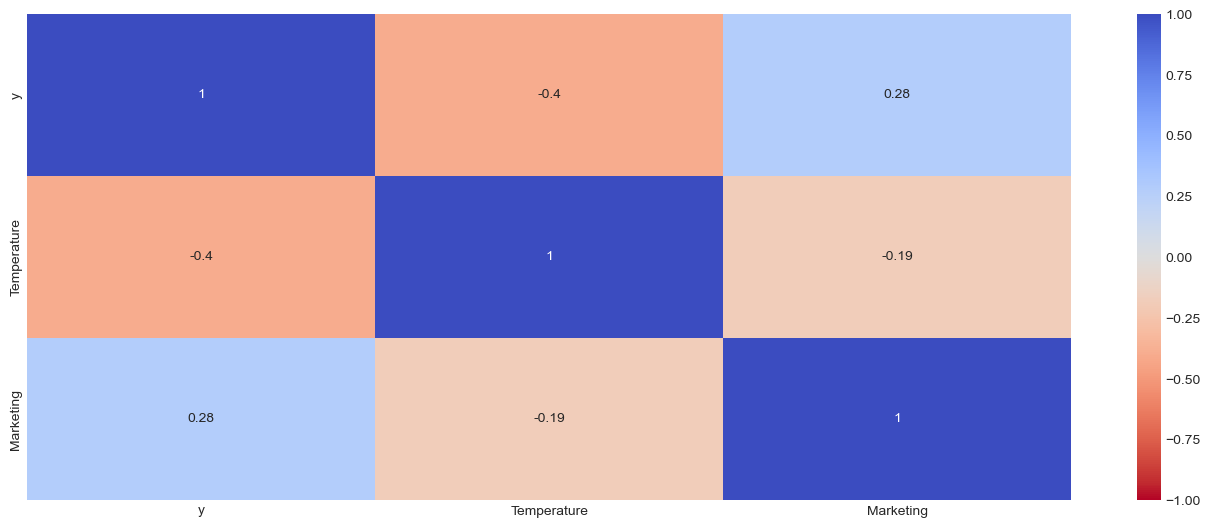

In [33]:
#f,ax = plt.subplots(3)

corrmatx = df[features].corr()

sns.heatmap(corrmatx, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r')

# AutoCorrelation

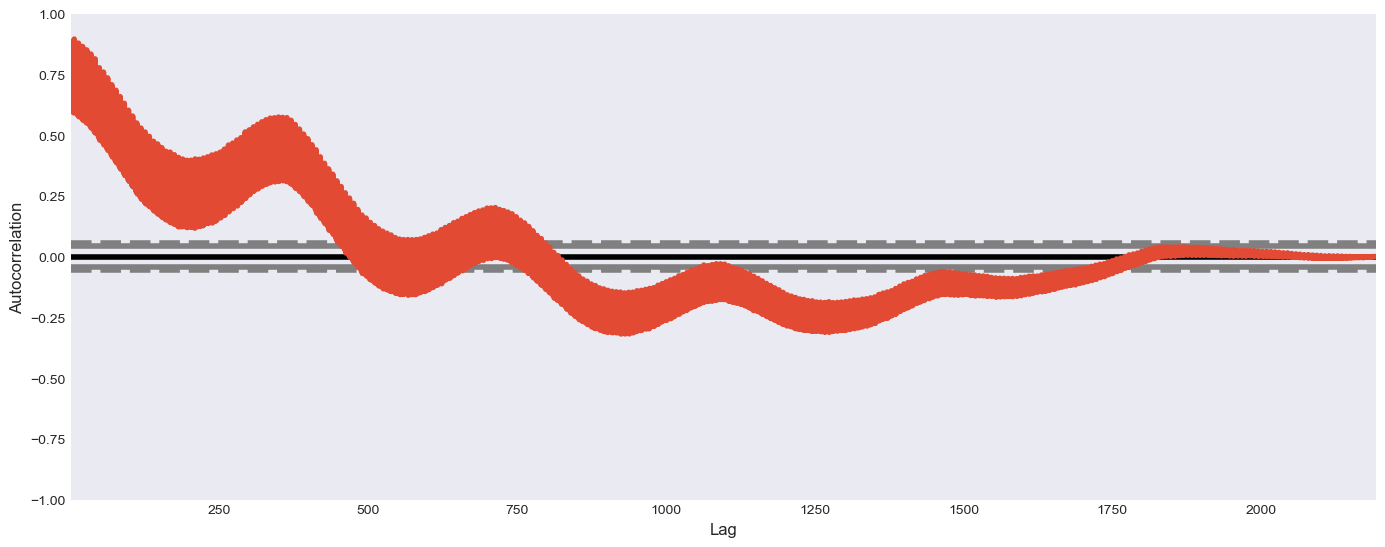

In [34]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df.y)
plt.show()

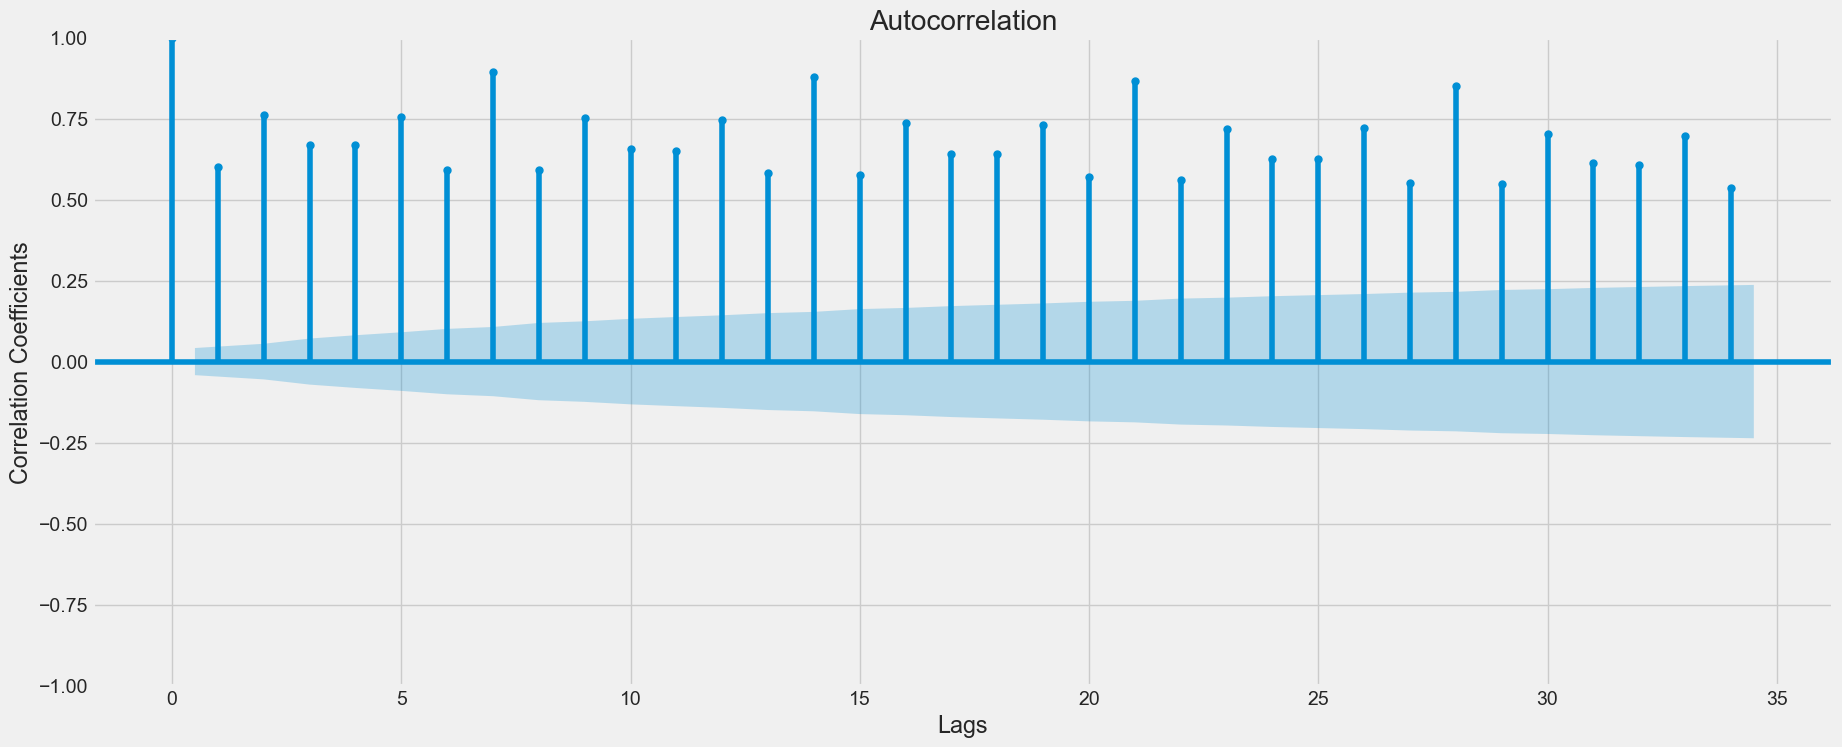

In [35]:
#ACF plot
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (20,8)
plot_acf(df.y)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficients')
plt.show();

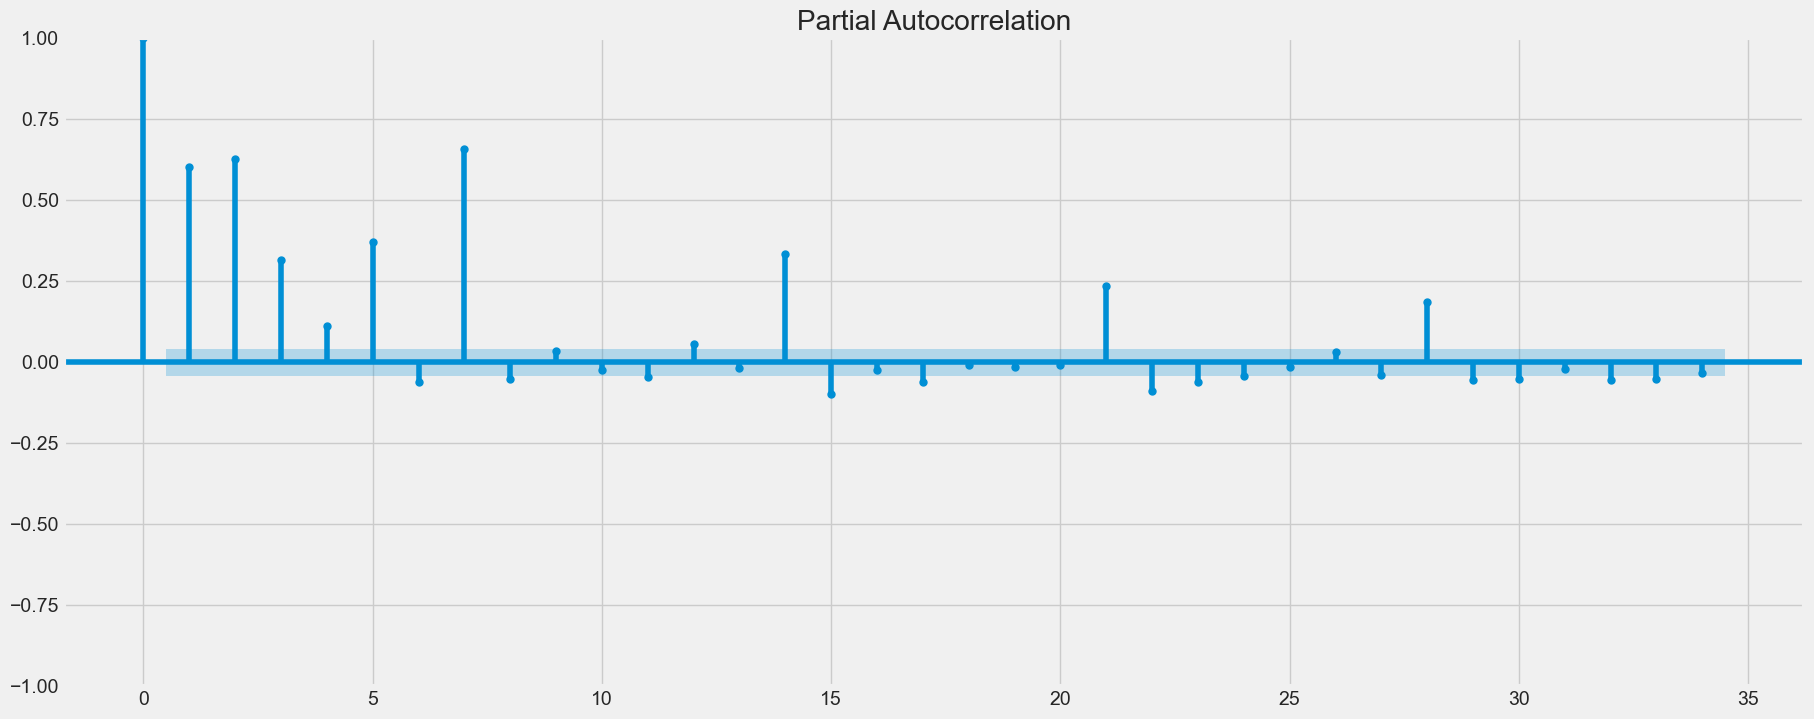

In [36]:
#PACF plot
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (20,8)
plot_pacf(df.y)
plt.show();